In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pasta raiz para as imagens
RAIZ = "/content/drive/MyDrive/IFCE/Mestrado em Ciência da Computação/Processamento Digital de Imagem/Trabalhos/"

#Pasta das imagens
IMG_BINA = RAIZ + "Imagens Binarias/"
IMG_GRAY = RAIZ + "Imagens Tom Cinza/"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funções gerais

In [ ]:
def carregar_imagem(img, grayscale):

  if grayscale:

    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

  else:

    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  return img

# Questão 25

Implemente as operações de erosão e dilatação utilizando três elementos
estruturantes distintos e compare os resultados.

In [ ]:
def operacoes_ero_dila(img_bin):

  ee_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
  ee_cruz     = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
  ee_elipse   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

  #Erosão
  erosao_quad = cv2.erode(img_bin, ee_quadrado)
  erosao_cruz = cv2.erode(img_bin, ee_cruz)
  erosao_elip = cv2.erode(img_bin, ee_elipse)

  #Dilatação
  dil_quad = cv2.dilate(img_bin, ee_quadrado)
  dil_cruz = cv2.dilate(img_bin, ee_cruz)
  dil_elip = cv2.dilate(img_bin, ee_elipse)

  return erosao_quad, erosao_cruz, erosao_elip, dil_quad, dil_cruz, dil_elip

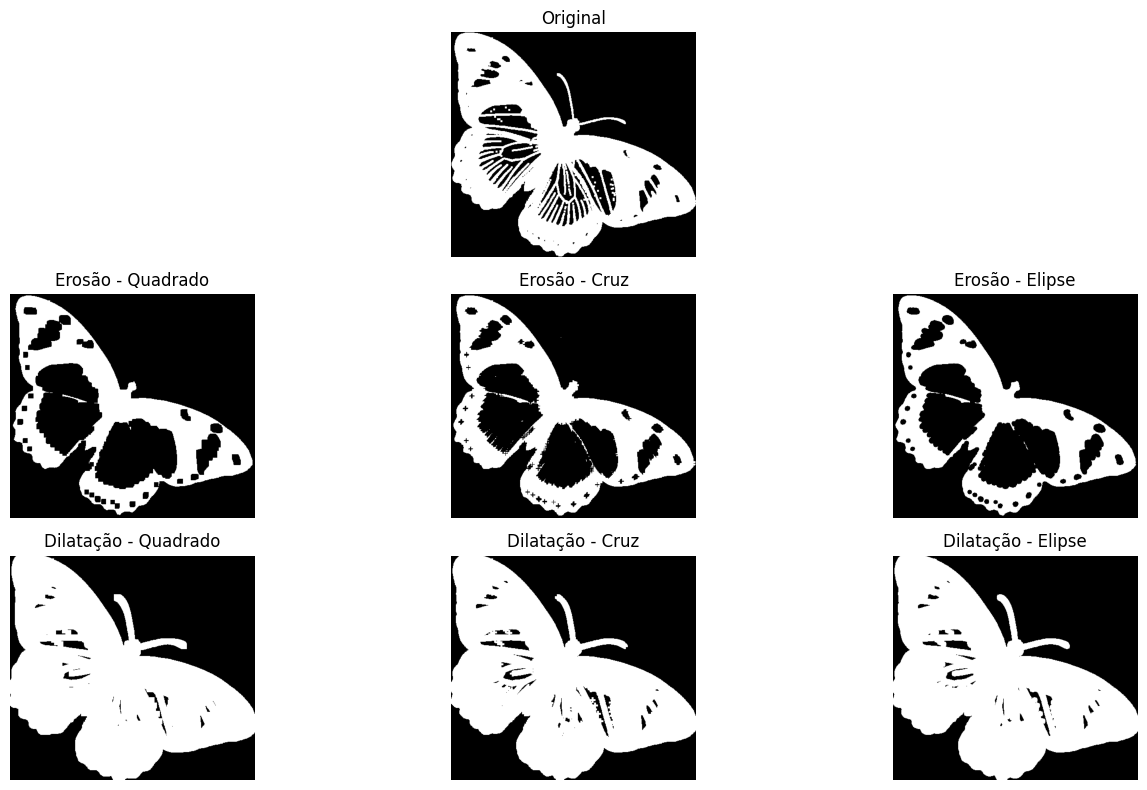

In [ ]:
butterfly_1_q25 = IMG_BINA + "butterfly-1.gif"

gray = True

img_butterfly_1_q25 = carregar_imagem(butterfly_1_q25, gray)

_, img_butterfly_bin_25 = cv2.threshold(img_butterfly_1_q25, 127, 255, cv2.THRESH_BINARY)

eros_q, eros_c, eros_e,dil_q, dil_c, dil_e = operacoes_ero_dila(img_butterfly_bin_25)

plt.figure(figsize=(14, 8))

plt.subplot(3, 3, 2)
plt.imshow(img_butterfly_bin_25, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

#Erosão
plt.subplot(3, 3, 4)
plt.imshow(eros_q, cmap='gray', vmin=0, vmax=255)
plt.title("Erosão - Quadrado")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(eros_c, cmap='gray', vmin=0, vmax=255)
plt.title("Erosão - Cruz")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(eros_e, cmap='gray', vmin=0, vmax=255)
plt.title("Erosão - Elipse")
plt.axis('off')

#Dilatação
plt.subplot(3, 3, 7)
plt.imshow(dil_q, cmap='gray', vmin=0, vmax=255)
plt.title("Dilatação - Quadrado")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(dil_c, cmap='gray', vmin=0, vmax=255)
plt.title("Dilatação - Cruz")
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(dil_e, cmap='gray', vmin=0, vmax=255)
plt.title("Dilatação - Elipse")
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 26

Realize a detecção de objetos conectados (blobs) em imagens binárias.

In [ ]:
def detecta_blobs(img_binaria, conectividade, area_min):

  #objetos pretos (0) viram 1
  #fundo branco (255) vira 0

  img01 = (img_binaria == 0).astype(np.uint8)

  num_rotulos, rotulos, stats, centroides = cv2.connectedComponentsWithStats(img01, connectivity=conectividade)

  stats_f = []
  centroides_f = []

  for i in range(1, num_rotulos):  #0 = fundo

    area = stats[i, cv2.CC_STAT_AREA]

    if area >= area_min:

      stats_f.append(stats[i])

      centroides_f.append(centroides[i])

  return len(stats_f), rotulos, np.array(stats_f), np.array(centroides_f)

In [ ]:
def processa_q26(img_binaria, conectividade, area_min):

  num_blobs, rotulos, stats_f, centroides_f = detecta_blobs(img_binaria, conectividade, area_min)

  saida = cv2.cvtColor(img_binaria, cv2.COLOR_GRAY2BGR)

  for k in range(len(stats_f)):

    x = int(stats_f[k, cv2.CC_STAT_LEFT])
    y = int(stats_f[k, cv2.CC_STAT_TOP])
    w = int(stats_f[k, cv2.CC_STAT_WIDTH])
    h = int(stats_f[k, cv2.CC_STAT_HEIGHT])
    area = int(stats_f[k, cv2.CC_STAT_AREA])

    cx = int(centroides_f[k, 0])
    cy = int(centroides_f[k, 1])

    cv2.rectangle(saida, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.circle(saida, (cx, cy), 4, (0, 0, 255), -1)
    cv2.putText(saida, f"A={area}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

  plt.figure(figsize=(14, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(img_binaria, cmap='gray', vmin=0, vmax=255)
  plt.title("Original")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(saida[:, :, ::-1])  #BGR -> RGB para matplotlib
  plt.title(f"Blobs detectados: {num_blobs}")
  plt.axis('off')

  plt.tight_layout()
  plt.show()

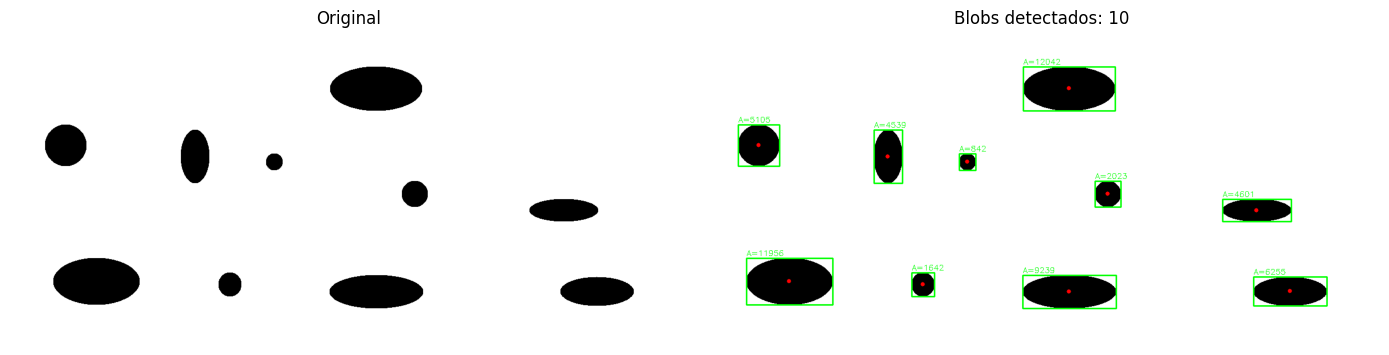

In [ ]:
blob_1_q26 = IMG_GRAY + "blob_1.png"

gray = True

img_blob_1_q26 = carregar_imagem(blob_1_q26, gray)

conectividade = 8

area_min = 10

processa_q26(img_blob_1_q26, conectividade, area_min)

Inicialmente, o algoritmo detectou apenas um componente conectado devido à interpretação incorreta do fundo como objeto. Após a inversão da imagem binária, garantindo que os objetos de interesse estivessem representados por pixels brancos, a detecção de blobs passou a identificar corretamente cada componente conectado.

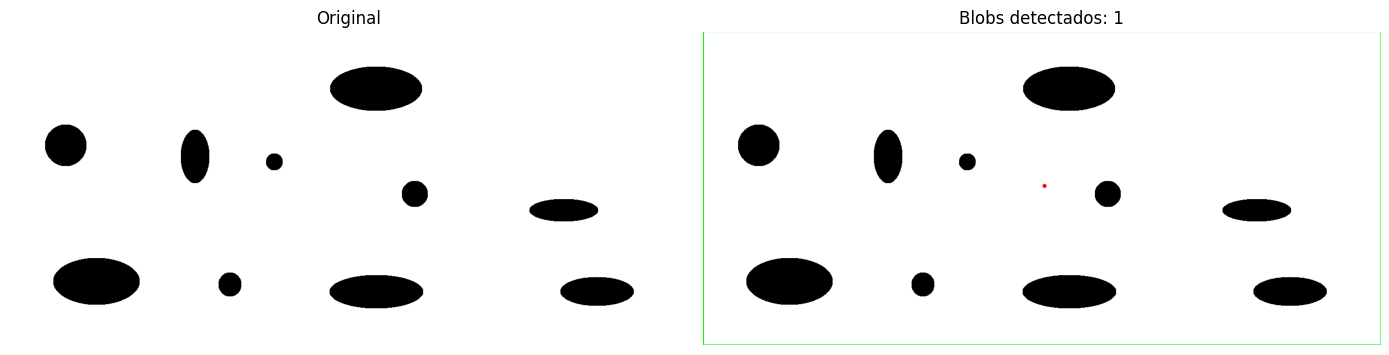

https://stackoverflow.com/questions/61703440/blob-detection-in-opencv-works-well-but-for-some-reason-it-fails-for-a-specific

https://stackoverflow.com/questions/36745046/setting-blob-detection-parameters-in-python

# Questão 27

Implemente o gradiente morfológico em imagens em tons de cinza e compare
com outros métodos de realce.

In [ ]:
def gradiente_morfologico(img, ksize):

  ee = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))

  dil = cv2.dilate(img, ee)

  ero = cv2.erode(img, ee)

  grad = cv2.subtract(dil, ero)

  return grad

In [ ]:
def passa_alta_laplaciano(img):

  lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)

  lap = cv2.convertScaleAbs(lap)

  return lap

In [ ]:
def realce_sobel(img):

  sx = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3)
  sy = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3)

  sx = cv2.convertScaleAbs(sx)

  sy = cv2.convertScaleAbs(sy)

  mag = cv2.addWeighted(sx, 0.5, sy, 0.5, 0)

  return mag

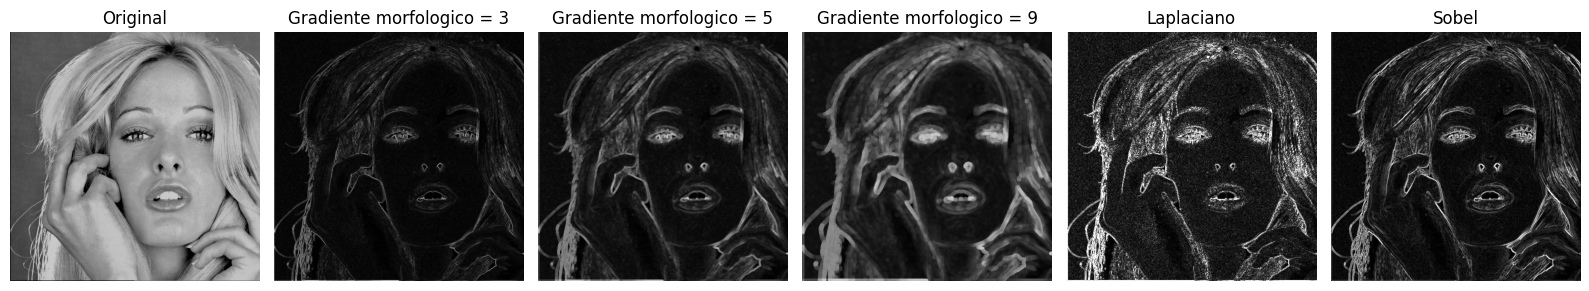

In [ ]:
woman_blonde_q27 = IMG_GRAY + "woman_blonde.tif"

gray = True

img_woman_blonde_q27 = carregar_imagem(woman_blonde_q27, gray)


grad_morf_k3 = gradiente_morfologico(img_woman_blonde_q27, 3)
grad_morf_k5 = gradiente_morfologico(img_woman_blonde_q27, 5)
grad_morf_k9 = gradiente_morfologico(img_woman_blonde_q27, 9)

lap = passa_alta_laplaciano(img_woman_blonde_q27)
sob = realce_sobel(img_woman_blonde_q27)

plt.figure(figsize=(16, 6))

plt.subplot(1, 6, 1)
plt.imshow(img_woman_blonde_q27, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(grad_morf_k3, cmap='gray', vmin=0, vmax=255)
plt.title(f"Gradiente morfologico = 3")
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(grad_morf_k5, cmap='gray', vmin=0, vmax=255)
plt.title(f"Gradiente morfologico = 5")
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(grad_morf_k9, cmap='gray', vmin=0, vmax=255)
plt.title(f"Gradiente morfologico = 9")
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(lap, cmap='gray', vmin=0, vmax=255)
plt.title("Laplaciano")
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(sob, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel")
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 28

Aplique o crescimento de regiões em imagens binárias, com inicialização por
clique do usuário.

**Não roda no Colab**

# Questão 29

Aplique o crescimento de regiões em imagens em tons de cinza, também com
inicialização por clique, discutindo critérios de similaridade.

**Não roda no Colab**

# Questão 30

Aplique a segmentação com K-means em imagens em tons de cinza, variando
o número de classes (K).

In [ ]:
def func_kmeans(img, k):

  dados = img.reshape((-1, 1)).astype(np.float32)

  criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.3)

  _, rotulos, centros = cv2.kmeans(dados, k, None, criterios, 3, cv2.KMEANS_PP_CENTERS)

  centros = centros.flatten()
  centros_ord = np.sort(centros)

  #mapeia cada pixel para o centro do seu cluster
  img_k = centros[rotulos.flatten()].reshape(img.shape)

  return img_k.astype(np.uint8), centros_ord

In [ ]:
def func_kmeans_rgb(img, k):

  dados = img.reshape((-1, 1)).astype(np.float32)

  criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.3)

  _, rotulos, centros = cv2.kmeans(dados, k, None, criterios, 3, cv2.KMEANS_PP_CENTERS)

  rotulos = rotulos.flatten()
  centros = centros.flatten()

  np.random.seed(5)
  cores = np.random.randint(0, 255, size=(k, 3), dtype=np.uint8)

  img_colorida = cores[rotulos].reshape((img.shape[0], img.shape[1], 3))

  return img_colorida, np.sort(centros)

In [ ]:
def mostra_resultados_q30(img, lista_k, rgb):

  plt.figure(figsize=(4 * (len(lista_k) + 1), 4))

  plt.subplot(1, len(lista_k) + 1, 1)
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title("Original")
  plt.axis('off')

  if (rgb == False):

    for i, k in enumerate(lista_k):

      img_seg, centros = func_kmeans(img, k)

      plt.subplot(1, len(lista_k) + 1, i + 2)
      plt.imshow(img_seg, cmap='gray', vmin=0, vmax=255)
      plt.title(f"K={k}")
      plt.axis('off')

  else:

    for i, k in enumerate(lista_k):

      img_color, centros = func_kmeans_rgb(img, k)

      plt.subplot(1, len(lista_k) + 1, i + 2)
      plt.imshow(img_color)
      plt.title(f"K={k}")
      plt.axis('off')

  plt.tight_layout()
  plt.show()

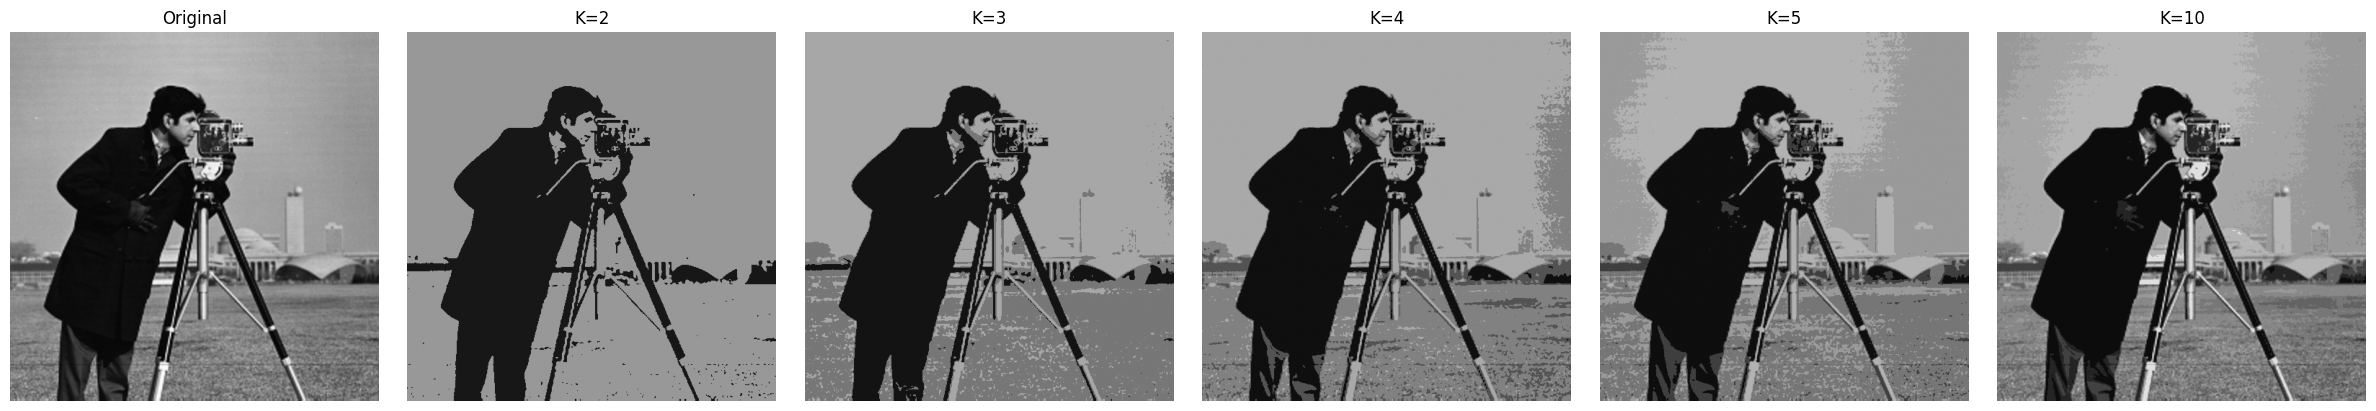

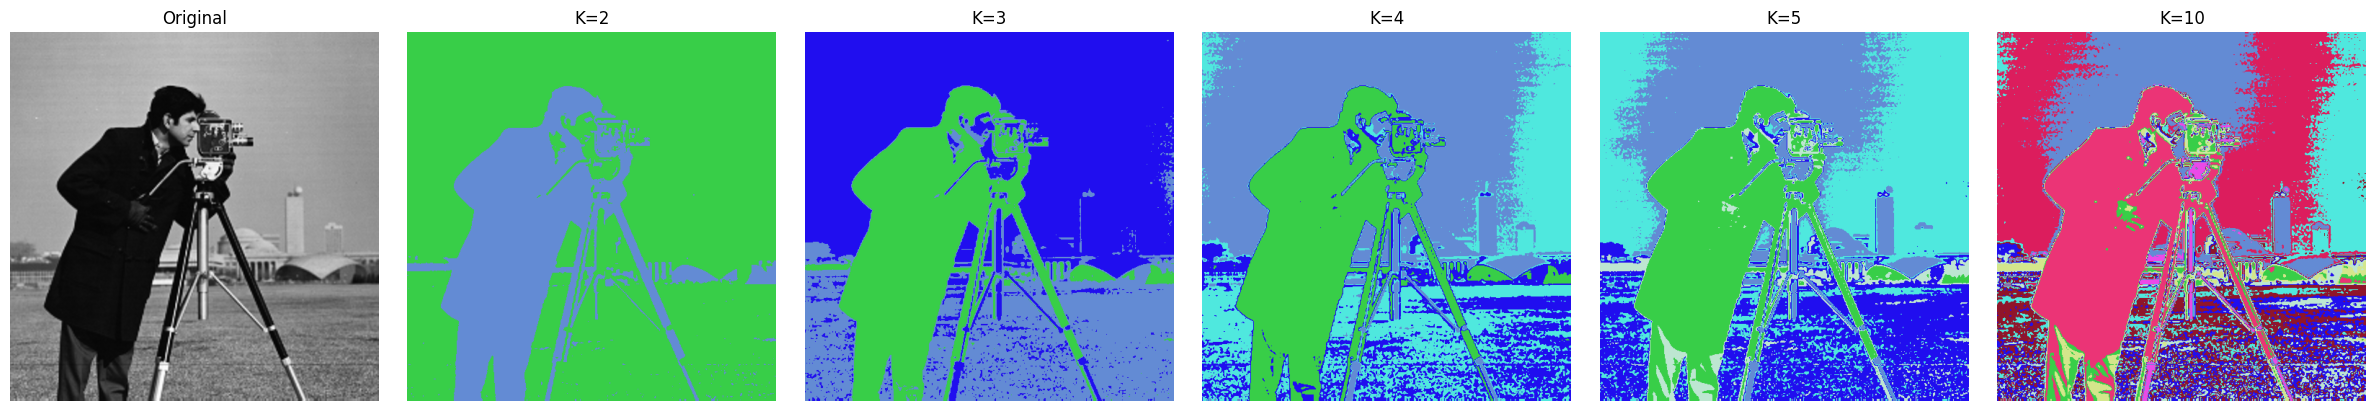

In [ ]:
cameraman_q30 = IMG_GRAY + "cameraman.tif"

gray = True

img_cameraman_q30 = carregar_imagem(cameraman_q30, gray)

mostra_resultados_q30(img_cameraman_q30, [2, 3, 4, 5, 10], False)

mostra_resultados_q30(img_cameraman_q30, [2, 3, 4, 5, 10], True)

# Questão 31

Realize a segmentação por similaridade, comparando limiarização e
clusterização.

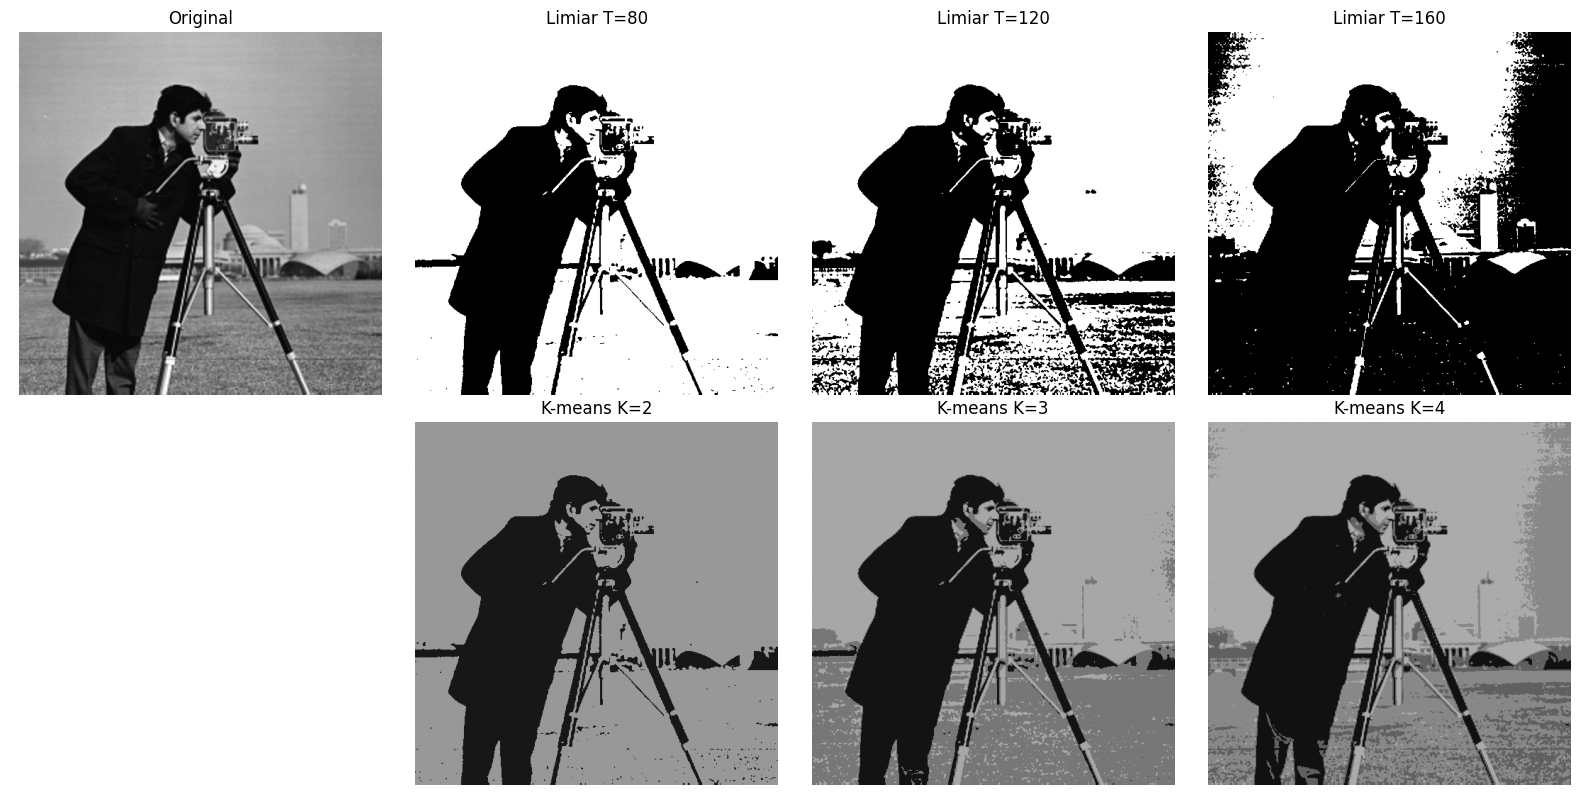

In [ ]:
cameraman_q31 = IMG_GRAY + "cameraman.tif"

gray = True
img_cameraman_q31 = carregar_imagem(cameraman_q31, gray)

limiares = [80, 120, 160]
lista_k = [2, 3, 4]

n = max(len(limiares), len(lista_k))

plt.figure(figsize=(4 * (n + 1), 8))

plt.subplot(2, n + 1, 1)
plt.imshow(img_cameraman_q31, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

# Limiarização
for i in range(n):

  plt.subplot(2, n + 1, i + 2)

  if i < len(limiares):

    T = limiares[i]

    _, img_bin = cv2.threshold(img_cameraman_q31, T, 255, cv2.THRESH_BINARY)

    plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Limiar T={T}")
    plt.axis('off')

#K-means
plt.subplot(2, n + 1, n + 2)
plt.axis('off')

for i in range(n):

  plt.subplot(2, n + 1, n + 3 + i)

  if i < len(lista_k):

    k = lista_k[i]

    img_k, centros = func_kmeans(img_cameraman_q31, k)
    plt.imshow(img_k, cmap='gray', vmin=0, vmax=255)
    plt.title(f"K-means K={k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 32

Aplique a Transformada de Hough para detecção de linhas e círculos.

In [ ]:
def detecta_linhas(img, limiar_canny1, limiar_canny2,limiar_hough, min_line_length, max_line_gap):

  bordas = cv2.Canny(img, limiar_canny1, limiar_canny2)

  linhas = cv2.HoughLinesP(
      bordas,
      rho=1,
      theta=np.pi/180,
      threshold=limiar_hough,
      minLineLength=min_line_length,
      maxLineGap=max_line_gap
  )

  img_saida = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  if linhas is not None:

    for x1, y1, x2, y2 in linhas[:, 0]:

      cv2.line(img_saida, (x1, y1), (x2, y2), (0, 255, 0), 2)

  return bordas, img_saida, linhas

In [ ]:
def detecta_circulos(img_cinza, limiar_canny, acumulador,min_dist, raio_min, raio_max):

  #Suaviza
  img_blur = cv2.GaussianBlur(img_cinza, (9, 9), 2)

  circulos = cv2.HoughCircles(
      img_blur,
      cv2.HOUGH_GRADIENT,
      dp=1.2,
      minDist=min_dist,
      param1=limiar_canny,
      param2=acumulador,
      minRadius=raio_min,
      maxRadius=raio_max
  )

  img_saida = cv2.cvtColor(img_cinza, cv2.COLOR_GRAY2BGR)

  if circulos is not None:

    circulos = np.uint16(np.around(circulos))

    for x, y, r in circulos[0, :]:

      cv2.circle(img_saida, (x, y), r, (0, 255, 0), 2)
      cv2.circle(img_saida, (x, y), 2, (0, 0, 255), 3)

  return img_blur, img_saida, circulos

In [ ]:
def resultado_q32(img):

  #Linhas
  bordas, img_linhas, linhas = detecta_linhas(img, 50, 150, 120, 40, 10)

  #Circulos
  img_blur, img_circulos, circulos = detecta_circulos(img, 150, 30, 30, 10, 80)

  plt.figure(figsize=(16, 10))

  plt.subplot(2, 3, 1)
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title("Original")
  plt.axis('off')

  plt.subplot(2, 3, 2)
  plt.imshow(bordas, cmap='gray')
  plt.title("Bordas")
  plt.axis('off')

  plt.subplot(2, 3, 3)
  plt.imshow(img_linhas[:, :, ::-1])
  plt.title("Linhas")
  plt.axis('off')

  plt.subplot(2, 3, 4)
  plt.imshow(img_blur, cmap='gray', vmin=0, vmax=255)
  plt.title("Suavização")
  plt.axis('off')

  plt.subplot(2, 3, 5)
  plt.imshow(img_circulos[:, :, ::-1])
  plt.title("Circulos")
  plt.axis('off')

  plt.subplot(2, 3, 6)
  plt.axis('off')

  txt_linhas = 0 if linhas is None else len(linhas)
  txt_circulos = 0 if circulos is None else circulos.shape[1]

  plt.text(0.05, 0.7, f"Linhas detectadas: {txt_linhas}", fontsize=12)
  plt.text(0.05, 0.5, f"Circulos detectados: {txt_circulos}", fontsize=12)

  plt.tight_layout()
  plt.show()

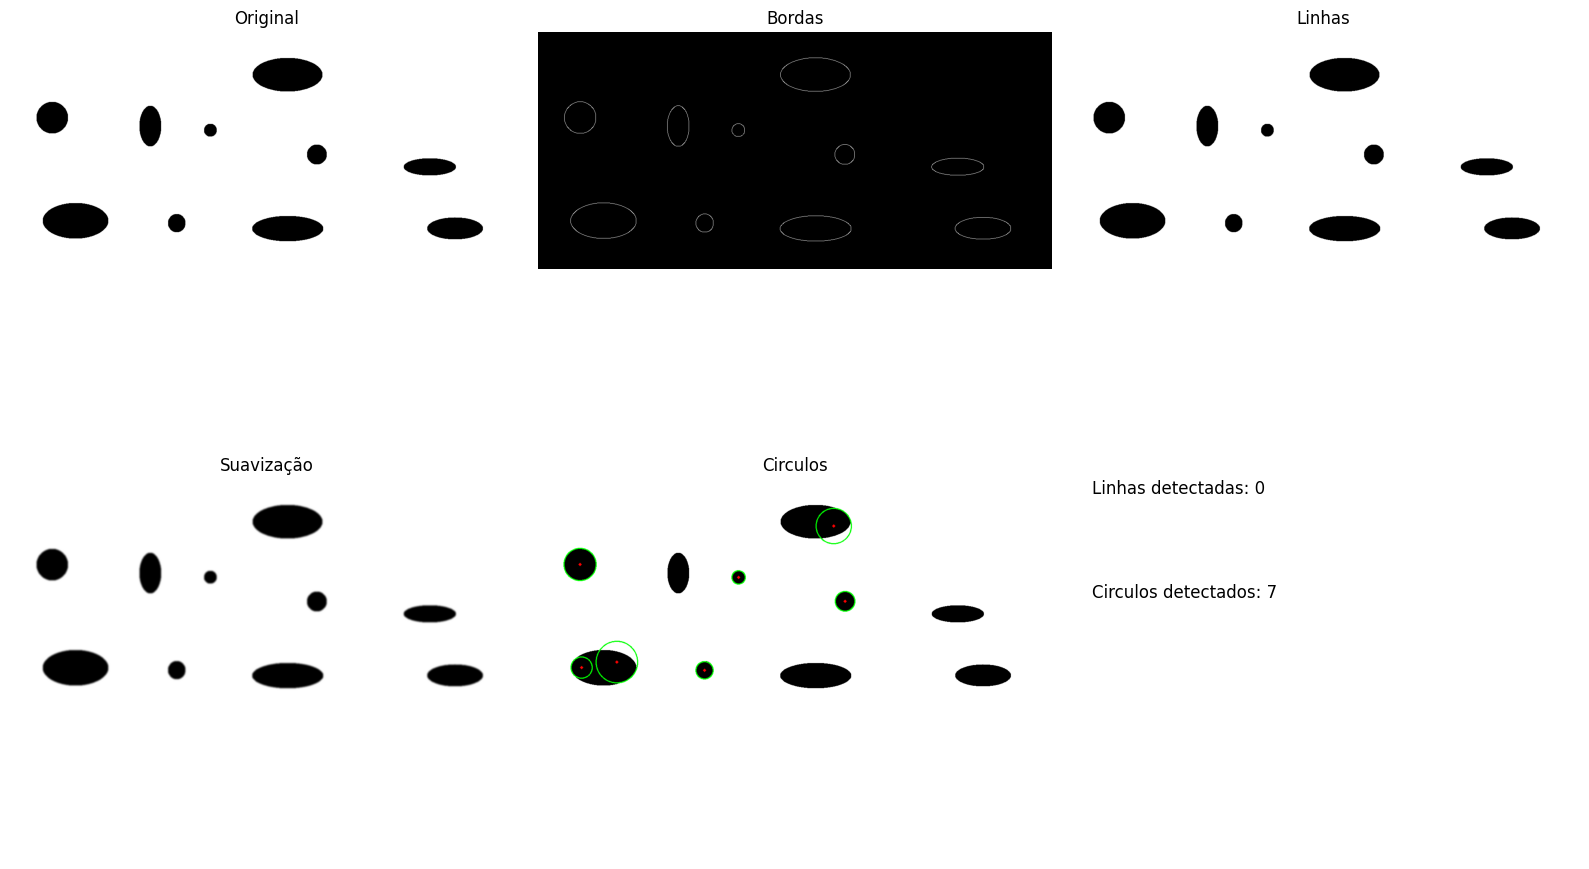

----


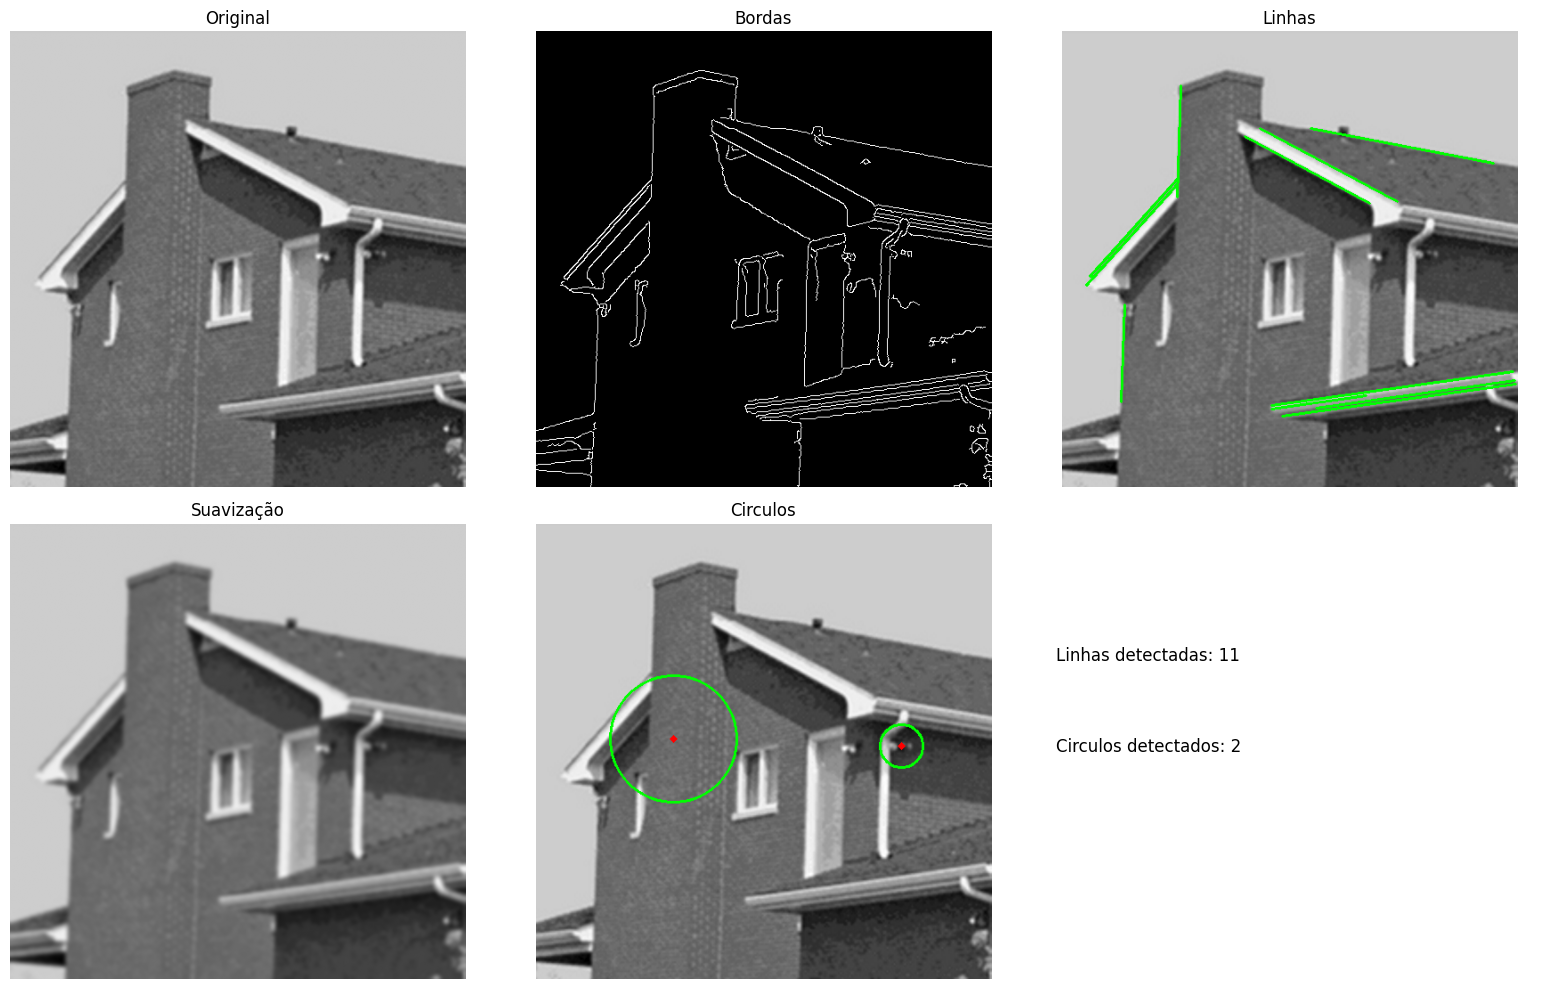

In [ ]:
blob_1_q32 = IMG_GRAY + "blob_1.png"
house_q32 = IMG_GRAY + "house.tif"

gray = True
img_blob_1_q32 = carregar_imagem(blob_1_q32, gray)
img_house_q32 = carregar_imagem(house_q32, gray)

resultado_q32(img_blob_1_q32)
print("----")
resultado_q32(img_house_q32)

# Questão 33

Utilize a Transformada de Watershed para segmentação de objetos, apresentando marcadores, gradiente e resultado final, discutindo problemas de supersegmentação.

In [ ]:
def segmentacao_water(img_cinza):

  #Suavizacao
  img_blur = cv2.GaussianBlur(img_cinza, (5, 5), 0)

  #Gradiente morfologico
  ee = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

  gradiente = cv2.morphologyEx(img_blur, cv2.MORPH_GRADIENT, ee)

  #Otsu
  _, img_bin = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  #Remocao de ruido
  ee2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

  abertura = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, ee2, iterations=2)

  #Fundo
  fundo_seguro = cv2.dilate(abertura, ee2, iterations=3)

  #Regiao de primeiro
  dist = cv2.distanceTransform(abertura, cv2.DIST_L2, 5)
  _, frente_segura = cv2.threshold(dist, 0.4 * dist.max(), 255, 0)
  frente_segura = np.uint8(frente_segura)

  desconhecido = cv2.subtract(fundo_seguro, frente_segura)

  #Marcadores
  _, marcadores = cv2.connectedComponents(frente_segura)
  marcadores = marcadores + 1
  marcadores[desconhecido == 255] = 0

  #Watershed
  img_color = cv2.cvtColor(img_cinza, cv2.COLOR_GRAY2BGR)
  marcadores_ws = cv2.watershed(img_color, marcadores)

  #bordas do watershed
  resultado = img_color.copy()
  resultado[marcadores_ws == -1] = [255, 0, 0]

  return gradiente, img_bin, marcadores, resultado

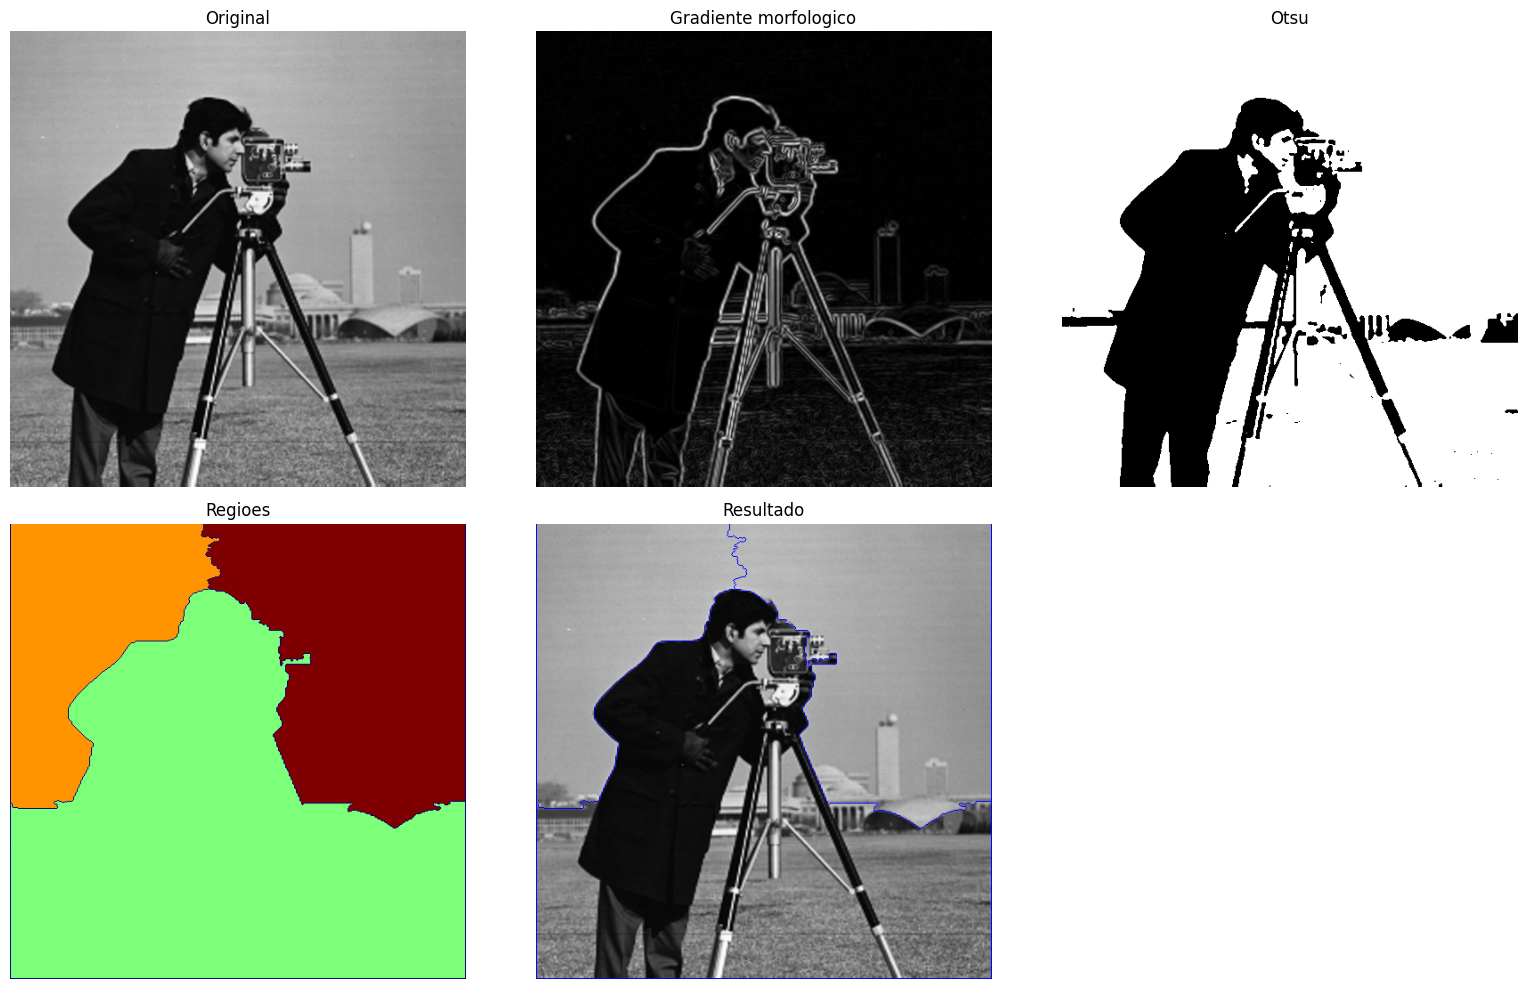

In [ ]:
cameraman_q33 = IMG_GRAY + "cameraman.tif"

gray = True

img_cameraman_q33 = carregar_imagem(cameraman_q33, gray)

gradiente, img_bin, marcadores, resultado = segmentacao_water(img_cameraman_q33)

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_cameraman_q33, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gradiente, cmap='gray')
plt.title("Gradiente morfologico")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_bin, cmap='gray')
plt.title("Otsu")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(marcadores, cmap='jet')
plt.title("Regioes")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(resultado[:, :, ::-1])
plt.title("Resultado")
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 34

Calcule os momentos centrais de uma região e discuta sua aplicação em
reconhecimento de formas.

In [ ]:
def calcula_centrais(img_binaria, maior_regiao):

  contornos, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if len(contornos) == 0:

    return None, None, 0

  if maior_regiao:

    contorno = max(contornos, key=cv2.contourArea)
    M = cv2.moments(contorno)

  else:

    mascara = np.zeros_like(img_bin)
    cv2.drawContours(mascara, contornos, -1, 255, -1)
    M = cv2.moments(mascara, binaryImage=True)

  if M["m00"] == 0:

    return M, None, 0

  cx = M["m10"] / M["m00"]
  cy = M["m01"] / M["m00"]

  return M, (cx, cy), M["m00"]

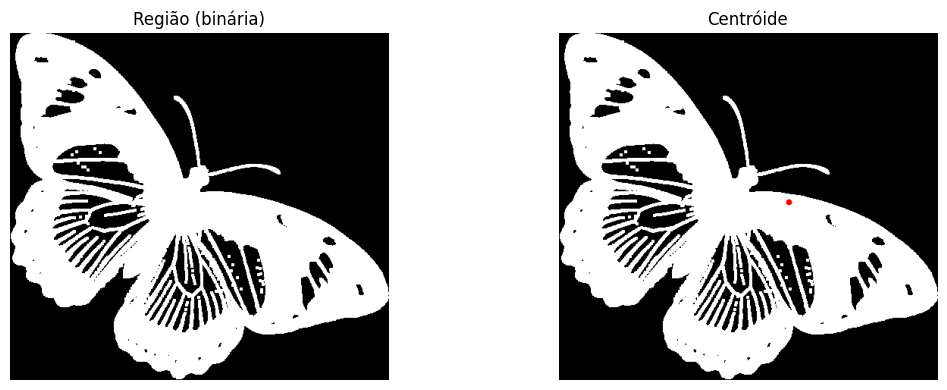

Area (m00): 171550.00
Centroide: (303.54, 224.13)


In [ ]:
butterfly_1_q35 = IMG_BINA + "butterfly-1.gif"

img_butterfly_1_q35 = cv2.imread(butterfly_1_q35, cv2.IMREAD_GRAYSCALE)

_, img_butterfly_bin_35 = cv2.threshold(img_butterfly_1_q35, 127, 255, cv2.THRESH_BINARY)

M, centroide, area = calcula_centrais(img_butterfly_bin_35, True)

saida = cv2.cvtColor(img_butterfly_bin_35, cv2.COLOR_GRAY2BGR)

if centroide is not None:
  cx, cy = int(centroide[0]), int(centroide[1])
  cv2.circle(saida, (cx, cy), 4, (0, 0, 255), -1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_butterfly_bin_35, cmap='gray', vmin=0, vmax=255)
plt.title("Região (binária)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saida[:, :, ::-1])
plt.title("Centróide")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Area (m00): {area:.2f}")
if centroide is not None:
  print(f"Centroide: ({centroide[0]:.2f}, {centroide[1]:.2f})")


# Questão 35

Aplique os momentos invariantes de Hu, discutindo sua robustez frente a
rotação, escala e translação.

In [ ]:
def calcula_hu(img_binaria, usar_maior_regiao=True):

  if img_binaria.dtype != np.uint8:

    img_binaria = img_binaria.astype(np.uint8)

  _, img_bin = cv2.threshold(img_binaria, 127, 255, cv2.THRESH_BINARY)

  contornos, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if len(contornos) == 0:

    return None, None

  if usar_maior_regiao:

    contorno = max(contornos, key=cv2.contourArea)
    M = cv2.moments(contorno)

  else:

    mascara = np.zeros_like(img_bin)
    cv2.drawContours(mascara, contornos, -1, 255, -1)
    M = cv2.moments(mascara, binaryImage=True)

  hu = cv2.HuMoments(M)  #(7,1)


  hu_log = -np.sign(hu) * np.log10(np.abs(hu) + 1e-30)
  hu_log = hu_log.flatten()

  return hu, hu_log

In [ ]:
def translada_img(img, dx, dy):

  h, w = img.shape
  M = np.float32([[1, 0, dx], [0, 1, dy]])

  return cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_NEAREST, borderValue=0)

In [ ]:
def escala_img(img, escala):

  h, w = img.shape

  nova_w = int(w * escala)
  nova_h = int(h * escala)

  red = cv2.resize(img, (nova_w, nova_h), interpolation=cv2.INTER_NEAREST)
  saida = np.zeros((h, w), dtype=np.uint8)

  y0 = max((h - nova_h) // 2, 0)
  x0 = max((w - nova_w) // 2, 0)
  y1 = min(y0 + nova_h, h)
  x1 = min(x0 + nova_w, w)
  saida[y0:y1, x0:x1] = red[0:(y1 - y0), 0:(x1 - x0)]

  return saida

In [ ]:
def rotaciona_img(img, angulo_graus):

  h, w = img.shape

  centro = (w // 2, h // 2)

  M = cv2.getRotationMatrix2D(centro, angulo_graus, 1.0)

  return cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_NEAREST, borderValue=0)

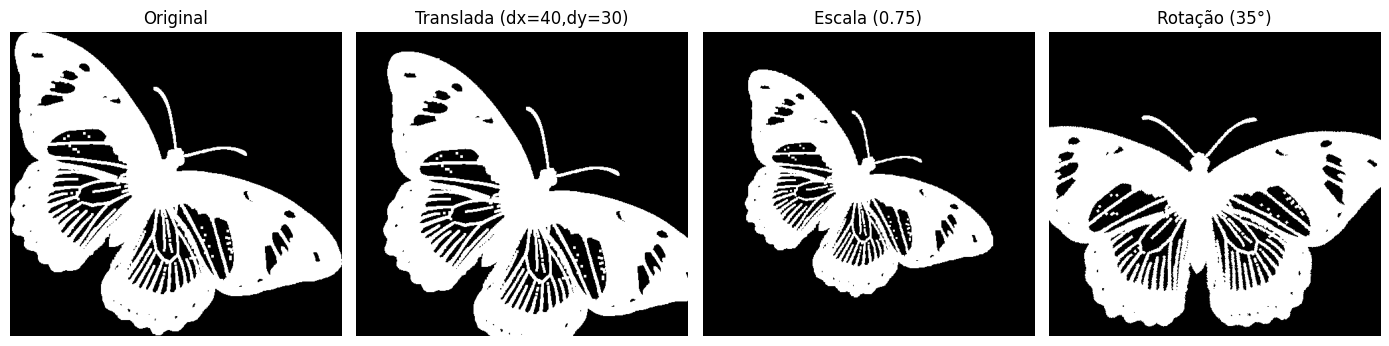

Momentos de Hu:

Original:
  Hu1: 0.643263
  Hu2: 1.811064
  Hu3: 2.473201
  Hu4: 3.676448
  Hu5: -6.752347
  Hu6: -4.582679
  Hu7: 7.904566

Translada (dx=40,dy=30):
  Hu1: 0.651842
  Hu2: 1.832214
  Hu3: 2.545336
  Hu4: 3.757802
  Hu5: -6.936513
  Hu6: -4.684005
  Hu7: -7.374358

Escala (0.75):
  Hu1: 0.642447
  Hu2: 1.807947
  Hu3: 2.468707
  Hu4: 3.670937
  Hu5: -6.741788
  Hu6: -4.575592
  Hu7: 7.903399

Rotação (35°):
  Hu1: 0.672421
  Hu2: 1.956198
  Hu3: 2.707255
  Hu4: 3.885953
  Hu5: -7.376090
  Hu6: -5.005905
  Hu7: 7.297182


In [ ]:
butterfly_1_q36 = IMG_BINA + "butterfly-1.gif"

img_butterfly_1_q36 = cv2.imread(butterfly_1_q36, cv2.IMREAD_GRAYSCALE)

_, img_butterfly_bin_36 = cv2.threshold(img_butterfly_1_q36, 127, 255, cv2.THRESH_BINARY)

img_trans = translada_img(img_butterfly_bin_36, dx=40, dy=30)
img_esc   = escala_img(img_butterfly_bin_36, escala=0.75)
img_rot   = rotaciona_img(img_butterfly_bin_36, angulo_graus=35)

imgs = [
  ("Original", img_butterfly_bin_36),
  ("Translada (dx=40,dy=30)", img_trans),
  ("Escala (0.75)", img_esc),
  ("Rotação (35°)", img_rot),
]

plt.figure(figsize=(14, 6))

for i, (nome, im) in enumerate(imgs):

  plt.subplot(1, 4, i + 1)
  plt.imshow(im, cmap='gray', vmin=0, vmax=255)
  plt.title(nome)
  plt.axis('off')

plt.tight_layout()
plt.show()

#calcula Hu
resultados = {}

for nome, im in imgs:

  hu, hu_log = calcula_hu(im, usar_maior_regiao=True)
  resultados[nome] = hu_log

print("Momentos de Hu:")
for nome, hu_log in resultados.items():

  print(f"\n{nome}:")

  for i, v in enumerate(hu_log, start=1):

    print(f"  Hu{i}: {v:.6f}")

# Questão 36

Implemente o descritor LBP (Local Binary Pattern) e utilize-o para diferenciação de texturas.

In [ ]:
def lbp_basico(img, raio=1):

  h, w = img.shape
  lbp = np.zeros((h, w), dtype=np.uint8)

  viz = [(-raio, -raio), (-raio, 0), (-raio, raio),
         (0, raio), (raio, raio), (raio, 0),
         (raio, -raio), (0, -raio)]

  for y in range(raio, h - raio):

    for x in range(raio, w - raio):

      centro = int(img[y, x])
      codigo = 0

      for i, (dy, dx) in enumerate(viz):

        val = int(img[y + dy, x + dx])

        if val >= centro:

          codigo |= (1 << (7 - i))

      lbp[y, x] = codigo

  return lbp

In [ ]:
def histograma_lbp(img_lbp, num_bins=256):

  hist = cv2.calcHist([img_lbp], [0], None, [num_bins], [0, 256]).ravel()
  hist = hist / (hist.sum() + 1e-12)

  return hist

In [ ]:
def distancia_chi_quadrado(h1, h2):

  return 0.5 * np.sum(((h1 - h2) ** 2) / (h1 + h2 + 1e-12))

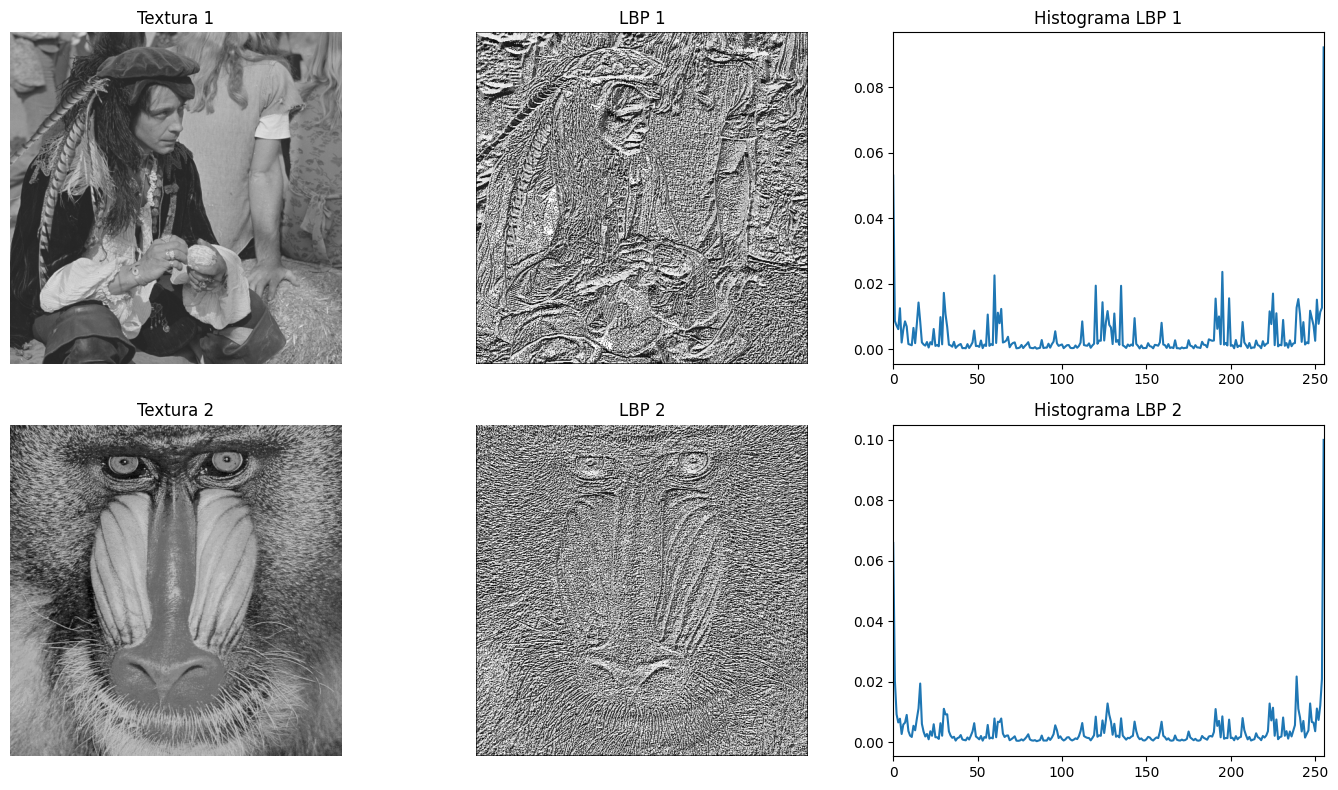

In [ ]:
pirate_q36 = IMG_GRAY + "pirate.tif"
mandril_ref_q36 = IMG_GRAY + "mandril_color.tif"

gray = True

img_pirate_q36 = carregar_imagem(pirate_q36, gray)
img_mandril_q36   = carregar_imagem(mandril_ref_q36, gray)

raio = 1

lbp1 = lbp_basico(img_pirate_q36, raio=raio)
lbp2 = lbp_basico(img_mandril_q36, raio=raio)

h1 = histograma_lbp(lbp1)
h2 = histograma_lbp(lbp2)

dist = distancia_chi_quadrado(h1, h2)

plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_pirate_q36, cmap='gray', vmin=0, vmax=255)
plt.title("Textura 1")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(lbp1, cmap='gray', vmin=0, vmax=255)
plt.title("LBP 1")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.plot(h1)
plt.title("Histograma LBP 1")
plt.xlim([0, 255])

plt.subplot(2, 3, 4)
plt.imshow(img_mandril_q36, cmap='gray', vmin=0, vmax=255)
plt.title("Textura 2")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(lbp2, cmap='gray', vmin=0, vmax=255)
plt.title("LBP 2")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.plot(h2)
plt.title(f"Histograma LBP 2")
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

# Questão 37

Calcule os descritores de Haralick (GLCM) em diferentes direções e distâncias
e analise sua eficácia na caracterização de texturas.

In [ ]:
def quantiza_niveis(img, niveis=16):

  img_q = (img.astype(np.float32) * (niveis / 256.0)).astype(np.int32)
  img_q = np.clip(img_q, 0, niveis - 1).astype(np.uint8)

  return img_q

In [ ]:
def calcula_glcm(img_q, distancia=1, angulo_graus=0, niveis=16, simetrica=True, normaliza=True):

  h, w = img_q.shape
  glcm = np.zeros((niveis, niveis), dtype=np.float64)

  #deslocamentos (dx, dy)
  if angulo_graus == 0:

    dx, dy = distancia, 0

  elif angulo_graus == 45:

    dx, dy = distancia, -distancia

  elif angulo_graus == 90:

    dx, dy = 0, -distancia

  elif angulo_graus == 135:

    dx, dy = -distancia, -distancia

  #limites
  y_ini = max(0, -dy)
  y_fim = min(h, h - dy)
  x_ini = max(0, -dx)
  x_fim = min(w, w - dx)

  for y in range(y_ini, y_fim):

    for x in range(x_ini, x_fim):

      i = int(img_q[y, x])
      j = int(img_q[y + dy, x + dx])
      glcm[i, j] += 1.0

      if simetrica:

        glcm[j, i] += 1.0

  if normaliza:

    s = glcm.sum()

    if s > 0:

      glcm = glcm / s

  return glcm

In [ ]:
def descritores_haralick(glcm):

  n = glcm.shape[0]
  i_idx, j_idx = np.indices((n, n))

  mu_i = np.sum(i_idx * glcm)
  mu_j = np.sum(j_idx * glcm)

  sigma_i = np.sqrt(np.sum(((i_idx - mu_i) ** 2) * glcm))
  sigma_j = np.sqrt(np.sum(((j_idx - mu_j) ** 2) * glcm))

  contraste = np.sum(((i_idx - j_idx) ** 2) * glcm)
  dissimilaridade = np.sum(np.abs(i_idx - j_idx) * glcm)
  homogeneidade = np.sum(glcm / (1.0 + (i_idx - j_idx) ** 2))
  asm = np.sum(glcm ** 2)
  energia = np.sqrt(asm)

  if sigma_i < 1e-12 or sigma_j < 1e-12:

    correlacao = 0.0

  else:

    correlacao = np.sum(((i_idx - mu_i) * (j_idx - mu_j) * glcm)) / (sigma_i * sigma_j)

  return {
    "contraste": float(contraste),
    "dissimilaridade": float(dissimilaridade),
    "homogeneidade": float(homogeneidade),
    "asm": float(asm),
    "energia": float(energia),
    "correlacao": float(correlacao),
  }

In [ ]:
def calcula_haralick_multiplos(img_cinza, distancias, angulos, niveis=16):

  img_q = quantiza_niveis(img_cinza, niveis=niveis)

  resultados = []
  for d in distancias:
    for a in angulos:
      glcm = calcula_glcm(img_q, distancia=d, angulo_graus=a, niveis=niveis, simetrica=True, normaliza=True)
      feats = descritores_haralick(glcm)
      feats["distancia"] = d
      feats["angulo"] = a
      resultados.append(feats)

  return resultados

In [ ]:
def mostra_resultados_q37(img1, img2, distancias=(1, 2, 4), angulos=(0, 45, 90, 135), niveis=16, titulo1="Textura 1", titulo2="Textura 2"):


  res1 = calcula_haralick_multiplos(img1, distancias, angulos, niveis=niveis)
  res2 = calcula_haralick_multiplos(img2, distancias, angulos, niveis=niveis)

  #Visualização das imagens
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1); plt.imshow(img1, cmap="gray", vmin=0, vmax=255); plt.title(titulo1); plt.axis("off")
  plt.subplot(1, 2, 2); plt.imshow(img2, cmap="gray", vmin=0, vmax=255); plt.title(titulo2); plt.axis("off")
  plt.tight_layout()
  plt.show()

  def imprime(res, nome):

    print(f"\n=== {nome} | niveis={niveis} ===")
    for r in res:
      print(f"d={r['distancia']}, ang={r['angulo']:>3}° | "
            f"contr={r['contraste']:.4f} | diss={r['dissimilaridade']:.4f} | "
            f"homo={r['homogeneidade']:.4f} | asm={r['asm']:.6f} | "
            f"ener={r['energia']:.4f} | corr={r['correlacao']:.4f}")

  imprime(res1, titulo1)
  imprime(res2, titulo2)

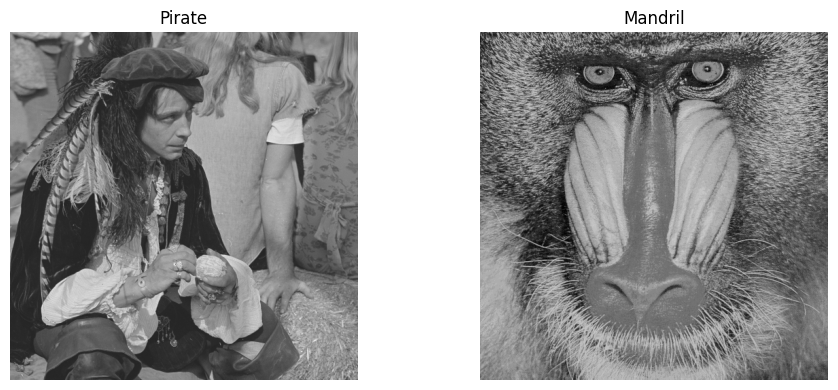


=== Pirate | niveis=16 ===
d=1, ang=  0° | contr=0.8488 | diss=0.4743 | homo=0.7956 | asm=0.051088 | ener=0.2260 | corr=0.9530
d=1, ang= 45° | contr=1.1440 | diss=0.5688 | homo=0.7641 | asm=0.046745 | ener=0.2162 | corr=0.9367
d=1, ang= 90° | contr=0.6831 | diss=0.4195 | homo=0.8138 | asm=0.054640 | ener=0.2338 | corr=0.9622
d=1, ang=135° | contr=1.1751 | diss=0.5832 | homo=0.7585 | asm=0.045879 | ener=0.2142 | corr=0.9350
d=2, ang=  0° | contr=1.7643 | diss=0.7281 | homo=0.7186 | asm=0.040435 | ener=0.2011 | corr=0.9024
d=2, ang= 45° | contr=2.1642 | diss=0.8288 | homo=0.6904 | asm=0.037405 | ener=0.1934 | corr=0.8804
d=2, ang= 90° | contr=1.4317 | diss=0.6482 | homo=0.7403 | asm=0.043909 | ener=0.2095 | corr=0.9207
d=2, ang=135° | contr=2.2981 | diss=0.8688 | homo=0.6775 | asm=0.035959 | ener=0.1896 | corr=0.8730
d=4, ang=  0° | contr=3.0787 | diss=1.0271 | homo=0.6417 | asm=0.032214 | ener=0.1795 | corr=0.8300
d=4, ang= 45° | contr=3.6258 | diss=1.1459 | homo=0.6135 | asm=0.029801 

In [ ]:
pirate_q37 = IMG_GRAY + "pirate.tif"
mandril_ref_q37 = IMG_GRAY + "mandril_color.tif"

gray = True

img_pirate_q37 = carregar_imagem(pirate_q37, gray)
img_mandril_q37   = carregar_imagem(mandril_ref_q37, gray)

mostra_resultados_q37(img_pirate_q37, img_mandril_q37, distancias=(1,2,4), angulos=(0,45,90,135), niveis=16, titulo1="Pirate", titulo2="Mandril")

# Questão 38

Aplique a técnica SIFT (Scale Invariant Feature Transform) para detecção e
descrição de pontos-chave em imagens.

In [ ]:
def detecta_sift(img_cinza, nfeatures=0, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6):

  # SIFT pode não existir dependendo do OpenCV instalado
  if not hasattr(cv2, "SIFT_create"):
    raise RuntimeError("Seu OpenCV não tem SIFT_create(). Instale opencv-contrib-python ou atualize o OpenCV.")

  sift = cv2.SIFT_create(
      nfeatures=nfeatures,
      contrastThreshold=contrastThreshold,
      edgeThreshold=edgeThreshold,
      sigma=sigma
  )

  pontos_chave, descritores = sift.detectAndCompute(img_cinza, None)
  return pontos_chave, descritores

In [ ]:
def desenha_pontos_chave(img_cinza, pontos_chave):

  img_bgr = cv2.cvtColor(img_cinza, cv2.COLOR_GRAY2BGR)

  img_kp = cv2.drawKeypoints(
      img_bgr, pontos_chave, None,
      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
  )

  return img_kp[:, :, ::-1]  # BGR -> RGB

In [ ]:
def mostra_resultados_q38(img_cinza):

  pontos_chave, descritores = detecta_sift(img_cinza)

  img_kp_rgb = desenha_pontos_chave(img_cinza, pontos_chave)

  plt.figure(figsize=(14, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(img_cinza, cmap="gray", vmin=0, vmax=255)
  plt.title("Original")
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(img_kp_rgb)
  plt.title(f"Pontos: {len(pontos_chave)}")
  plt.axis("off")

  plt.tight_layout()
  plt.show()

  print(f"Total de pontos-chave: {len(pontos_chave)}")
  if descritores is None:
    print("Descritores: None")
  else:
    print(f"Descritores: shape={descritores.shape} | dtype={descritores.dtype} (cada descritor SIFT tem 128 dimensões)")

  return pontos_chave, descritores

In [ ]:
def mostra_matching_sift(img1_cinza, img2_cinza, max_matches=30):

  kp1, des1 = detecta_sift(img1_cinza)
  kp2, des2 = detecta_sift(img2_cinza)

  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
  pares = bf.knnMatch(des1, des2, k=2)

  # Regra do ratio test (Lowe)
  bons = []
  for m, n in pares:
    if m.distance < 0.75 * n.distance:
      bons.append(m)

  bons = sorted(bons, key=lambda x: x.distance)[:max_matches]

  img_out = cv2.drawMatches(
      cv2.cvtColor(img1_cinza, cv2.COLOR_GRAY2BGR), kp1,
      cv2.cvtColor(img2_cinza, cv2.COLOR_GRAY2BGR), kp2,
      bons, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
  )

  plt.figure(figsize=(16, 6))
  plt.imshow(img_out[:, :, ::-1])
  plt.title(f"Matching SIFT (bons matches: {len(bons)})")
  plt.axis("off")
  plt.show()

  return bons

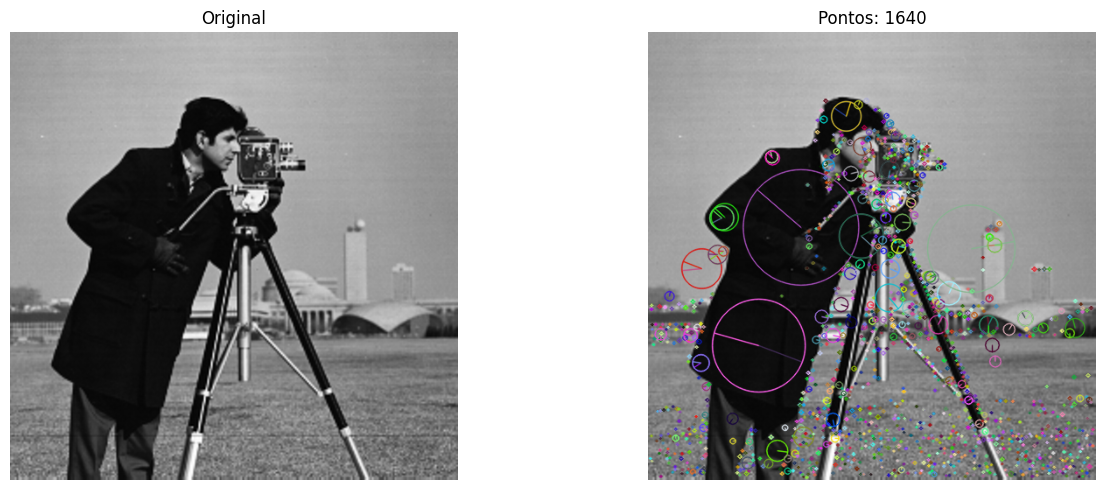

Total de pontos-chave: 1640
Descritores: shape=(1640, 128) | dtype=float32 (cada descritor SIFT tem 128 dimensões)


In [ ]:
cameraman_q38 = IMG_GRAY + "cameraman.tif"
img_cameraman_q38 = carregar_imagem(cameraman_q38, True)
kp, des = mostra_resultados_q38(img_cameraman_q38)

# Questão 39

Aplique a técnica SURF (Speeded Up Robust Features) e compare em
robustez e desempenho com SIFT.